In [4]:
import json 
import pandas as pd 
import numpy as np 
import sqlite3 
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [35]:
#Establish connection to the database (database.db file)
con = sqlite3.connect(r'C:\Users\See-Laptop\Documents\database3.db')

In [6]:
#Write a query to pull down data, feel free to change this to build your own attributes @Phat
query = '''
    SELECT gen.id as general_tweet_id, klm.id as KLM_reply_tweet_id, 
    gen.timestamp_ms as gen_timestamp_ms, klm.timestamp_ms as klm_timestamp_ms,
    gen.user as gen_user, klm.user as klm_user,
    users.followers_count
    FROM general_tweets as gen, KLM_tweets as klm, users
    
    WHERE gen.id = klm.in_reply_to_status_id AND gen.user_id = users.id AND klm.user_id == '56377143' AND gen.user_id <> '56377143'
'''

In [7]:
#Pull data from database into dataframe
df_data = pd.read_sql_query(query, con)
df_data

,general_tweet_id,KLM_reply_tweet_id,gen_timestamp_ms,klm_timestamp_ms,gen_user,klm_user,followers_count
0,1.1311830432412303e+18,1.1311852592892068e+18,2019-05-22 13:00:28.530,2019-05-22 13:09:16.877,"{'id': 3110268790, 'id_str': '3110268790', 'na...","{'id': 56377143, 'id_str': '56377143', 'name':...",14
1,1.1311824743804232e+18,1.1311879787710259e+18,2019-05-22 12:58:12.903,2019-05-22 13:20:05.252,"{'id': 1604219274, 'id_str': '1604219274', 'na...","{'id': 56377143, 'id_str': '56377143', 'name':...",17
2,1.1311830804741243e+18,1.1311880285281075e+18,2019-05-22 13:00:37.407,2019-05-22 13:20:17.115,"{'id': 879493539012296704, 'id_str': '87949353...","{'id': 56377143, 'id_str': '56377143', 'name':...",3
3,1.1311824743804232e+18,1.1311880893287342e+18,2019-05-22 12:58:12.903,2019-05-22 13:20:31.611,"{'id': 1604219274, 'id_str': '1604219274', 'na...","{'id': 56377143, 'id_str': '56377143', 'name':...",17
4,1.1311856772305756e+18,1.1311882878031421e+18,2019-05-22 13:10:56.522,2019-05-22 13:21:18.931,"{'id': 824207173425262593, 'id_str': '82420717...","{'id': 56377143, 'id_str': '56377143', 'name':...",137
...,...,...,...,...,...,...,...
4165,1.1452770176354836e+18,1.1452817192532541e+18,2019-06-30 10:24:53.879,2019-06-30 10:43:34.832,"{'id': 19698521, 'id_str': '19698521', 'name':...","{'id': 56377143, 'id_str': '56377143', 'name':...",195
4166,1.1452770176354836e+18,1.1452818873399747e+18,2019-06-30 10:24:53.879,2019-06-30 10:44:14.907,"{'id': 19698521, 'id_str': '19698521', 'name':...","{'id': 56377143, 'id_str': '56377143', 'name':...",195
4167,1.1452770176354836e+18,1.1452819381078385e+18,2019-06-30 10:24:53.879,2019-06-30 10:44:27.011,"{'id': 19698521, 'id_str': '19698521', 'name':...","{'id': 56377143, 'id_str': '56377143', 'name':...",195
4168,1.14526595941188e+18,1.1452820129552712e+18,2019-06-30 09:40:57.393,2019-06-30 10:44:44.856,"{'id': 1400896994, 'id_str': '1400896994', 'na...","{'id': 56377143, 'id_str': '56377143', 'name':...",2504


In [8]:
#@Marfa: you can probably do the same this as I did there with followers_count to extract other attributes

In [9]:
#Turn back the string of Timestamp data back to Timestamp object. If u don't understand, go ask @Phat
#Feel free to extract other attributes out of this Timestamp object, For example: timezone, day, year,...
df_data['gen_timestamp_ms'] = pd.to_datetime(df_data['gen_timestamp_ms'])
df_data['klm_timestamp_ms'] = pd.to_datetime(df_data['klm_timestamp_ms'])

In [10]:
#Get the reply time/duration between 2 tweets - return Timedelta object
df_data['reply_time'] = df_data['klm_timestamp_ms'] - df_data['gen_timestamp_ms']

In [11]:
#Extract the duration into seconds by attribute .seconds
#Feel free to extract other attibute from this 
df_data['reply_time_in_seconds'] = pd.Series([df_data['reply_time'].iloc[i].seconds for i in range(len(df_data))])
df_data['reply_time_in_minutes'] = pd.Series([df_data['reply_time'].iloc[i].min for i in range(len(df_data))])

In [12]:
#Drop duplicate datapoints
df_data.drop_duplicates(inplace=True)

In [13]:
df_data.to_csv('../database/CSV file/conversation.csv')

#### 2. Extract insight from the data

##### 2.1 Time-series analysis

In [14]:
query_KLM = '''
    SELECT *
    FROM KLM_tweets
'''
df_klm = pd.read_sql_query(query_KLM, con)

In [15]:
df_klm.set_index('', inplace=True)

In [16]:
df_klm['timestamp_ms'] = pd.to_datetime(df_klm['timestamp_ms'])

In [17]:
df_klm_reply = df_klm[df_klm.user_id == '56377143']
df_klm_mention = df_klm[df_klm.user_id != '56377143']

In [18]:
def oc(df_klm : pd.DataFrame) -> pd.DataFrame:
    df_klm.reset_index(drop=True, inplace=True)
    days = [df_klm.timestamp_ms.iloc[i].day for i in range(len(df_klm))]
    df_klm['days'] = pd.Series(days)
    df_day = df_klm[['id', 'days']].groupby('days').count()
    df_day['count'] = df_day['id']
    df_day = df_day[['count']]
    a = df_day.iloc[[0, 1]]
    df_day = df_day.append(a)
    df_day.reset_index(inplace=True)
    df_day = df_day.drop(index=[0,1])
    return df_day

def oc2(df_klm : pd.DataFrame) -> pd.DataFrame:
    df_klm.reset_index(drop=True, inplace=True)
    hours = [df_klm.timestamp_ms.iloc[i].hour for i in range(len(df_klm))]
    df_klm['hours'] = pd.Series(hours)
    df_day = df_klm[['id', 'hours']].groupby('hours').mean()
    df_day['count'] = df_day['id']
    df_day = df_day[['count']]
    df_day.reset_index(inplace=True)
    return df_day

def oc3(df_klm : pd.DataFrame) -> pd.DataFrame:
    df_klm.reset_index(drop=True, inplace=True)
    days = [df_klm.timestamp_ms.iloc[i].day for i in range(len(df_klm))]
    df_klm['days'] = pd.Series(days)
    df_klm.reset_index(drop=True, inplace=True)
    hours = [df_klm.timestamp_ms.iloc[i].hour for i in range(len(df_klm))]
    df_klm['hours'] = pd.Series(hours)
    df_klm = df_klm[['id', 'days', 'hours']].groupby(['days', 'hours']).count()
    df_klm = df_klm.groupby(['hours']).mean()
    df_klm['count'] = df_klm['id']
    df_klm.reset_index(inplace=True)
    return df_klm

In [19]:
df_rep = oc(df_klm_reply)
df_men = oc(df_klm_mention)

C:\Users\See-Laptop\AppData\Local\Temp/ipykernel_1256/690312861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_klm['days'] = pd.Series(days)


Text(0, 0.5, 'Tweets count')

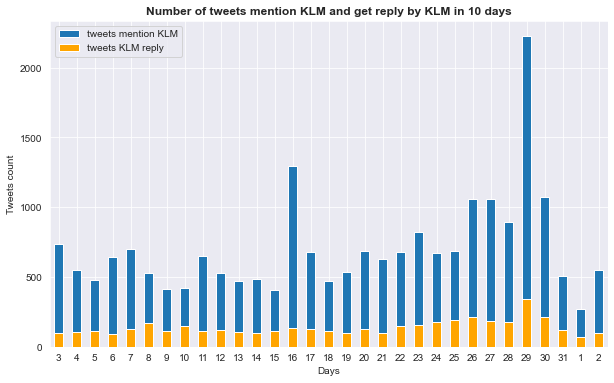

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
df_men.plot(kind='bar', x='days', y='count', ax=ax)
df_rep.plot(kind='bar', x='days', y='count', color='orange', ax=ax)
ax.legend(['tweets mention KLM', 'tweets KLM reply'])
ax.set_title('Number of tweets mention KLM and get reply by KLM in 10 days', size=12, weight='bold')
ax.set_xticklabels(df_men['days'], rotation='horizontal')
ax.set_xlabel('Days', size=10)
ax.set_ylabel('Tweets count', size=10)

In [21]:
df_hour_men = oc3(df_klm_mention)

C:\Users\See-Laptop\AppData\Local\Temp/ipykernel_1256/690312861.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_klm['days'] = pd.Series(days)
C:\Users\See-Laptop\AppData\Local\Temp/ipykernel_1256/690312861.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_klm['hours'] = pd.Series(hours)


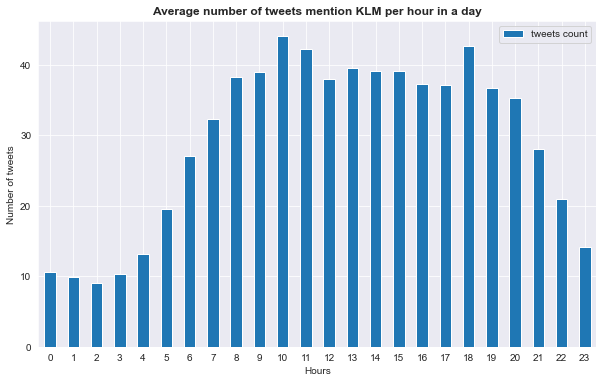

In [22]:
ax = df_hour_men.plot(kind='bar', x='hours', y='count', figsize=(10, 6))
ax.set_xticklabels(df_hour_men['hours'], rotation='horizontal')
ax.set_title('Average number of tweets mention KLM per hour in a day', size=12, weight='bold')
ax.legend(['tweets count'])
ax.set_xlabel('Hours', size=10)
ax.set_ylabel('Number of tweets', size=10);

#### 2. tweets troublesome account analysis

In [23]:
df_data['followers_count'] = df_data.followers_count.astype(int)

In [24]:
df_data['reply_time_in_minutes'] = df_data['reply_time_in_seconds']/60

Text(0, 0.5, 'Reply time by KLM in minute')

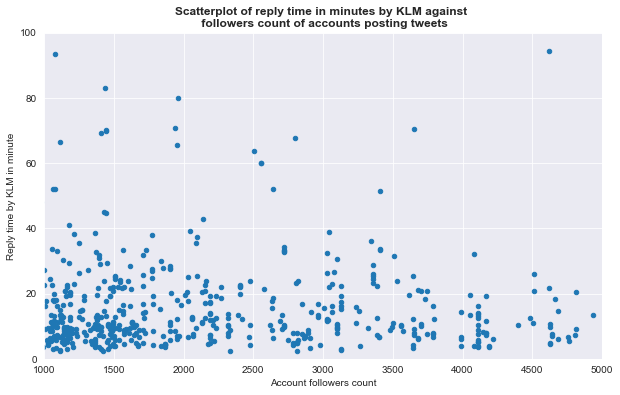

In [25]:
df_data = df_data.drop_duplicates()
ax = df_data.plot(kind='scatter', x='followers_count', y='reply_time_in_minutes', figsize=(10, 6));
ax.set_xlim(1000, 5000)
ax.set_ylim(0, 100)
ax.set_title('Scatterplot of reply time in minutes by KLM against \n followers count of accounts posting tweets', size=12, weight='bold')
ax.set_xlabel('Account followers count', size=10)
ax.set_ylabel('Reply time by KLM in minute')

#### 3. Statistics testing between KLM and British airways 

In [26]:
query ='''
    SELECT *
    FROM british_airways_conversation
'''
df_bri_con = pd.read_sql_query(query, con).drop_duplicates()
df_bri_con['reply_time_in_seconds'] = df_bri_con['reply_time_in_seconds'].astype(int)
bri = df_bri_con['reply_time_in_seconds']
len_bri = len(bri)

In [27]:
import statsmodels.api as sm
len_klm = len(df_data)
len_bri, len_klm

(13365, 4170)

In [28]:
klm = df_data['reply_time_in_seconds']

In [29]:
klm = klm.dropna()

In [30]:
#Check assumption by Anderson-Darling hypothesis testing
sm.stats.normal_ad(klm)[1], sm.stats.normal_ad(bri)[1]

C:\Users\See-Laptop\.conda\envs\week00\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),
C:\Users\See-Laptop\.conda\envs\week00\lib\site-packages\statsmodels\stats\_adnorm.py:47: RuntimeWarning: invalid value encountered in true_divide
  w = (y - xbar) / s


(0.0, 0.0)

In [31]:
d_bri = sm.stats.DescrStatsW(bri)
d_klm = sm.stats.DescrStatsW(klm)
cm = sm.stats.CompareMeans(d_bri, d_klm)
cm.ttest_ind(alternative='larger')
#Alternative hypothesis is bri > klm

(-32.885860395371495, 1.0, 17533.0)

In [32]:
a = cm.tconfint_diff(alpha=0.05, alternative='two-sided')
a[0]/60, a[1]/60

(-25.395167053631855, -22.538190260516824)

In [33]:
np.std(klm)/60, np.std(bri)/60

(84.2477589108141, 0.0)

In [34]:
klm.mean()/60, bri.mean()/60

(23.96667865707434, 0.0)